In [1]:
from msds601 import *

In [2]:
df = pd.read_csv('Credit.csv')
data = msds601('Credit.csv', y=df.Balance, X=[df.Income, df.Age])

In [3]:
data.mlr().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     56.47
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           2.60e-22
Time:                        15:12:51   Log-Likelihood:                -2969.3
No. Observations:                 400   AIC:                             5945.
Df Residuals:                     397   BIC:                             5957.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    359.6727     70.358      5.112      0.000     221.351     497.994
x1             6.2359      0.587     10.628      0.000       5.082       7.389
x2            -2.1851      1.199     -1.823      0.069      -4.542       0.172
==============================================================================
Omnibus:                       42.191   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.272
Skew:                           0.369   Prob(JB):                     3.96e-05
Kurtosis:                       2.180   Cond. No.                         267.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
data.OLSE()

array([359.67274306,   6.23587908,  -2.18506745])

In [5]:
data.resid()[:10]

array([ -45.23892528,   61.34370806, -276.762255  , -245.68237111,
       -228.56155148,  459.58466565, -206.75376472,  257.1364714 ,
        -30.77596271,  636.78721893])

In [6]:
data.SSE(), data.SSR(), data.SST()

(65659317.81768421, 18680594.092315786, 84339911.91)

In [7]:
data.MSE(), data.MSR(), data.MST(), data.F_stats()

(165388.70986822218,
 9340297.046157893,
 211378.22533834586,
 (56.47481653130991, 1.1102230246251565e-16))

In [8]:
a = data.ANOVA(1), data.ANOVA(2), data.ANOVA(3)

             df        sum_sq       mean_sq           F        PR(>F)
x1          1.0  1.813117e+07  1.813117e+07  109.627600  8.127912e-23
x2          1.0  5.494267e+05  5.494267e+05    3.322033  6.910931e-02
Residual  397.0  6.565932e+07  1.653887e+05         NaN           NaN
                sum_sq     df           F        PR(>F)
x1        1.868031e+07    1.0  112.947916  2.197302e-23
x2        5.494267e+05    1.0    3.322033  6.910931e-02
Residual  6.565932e+07  397.0         NaN           NaN
                 sum_sq     df           F        PR(>F)
Intercept  4.322055e+06    1.0   26.132706  4.966220e-07
x1         1.868031e+07    1.0  112.947916  2.197302e-23
x2         5.494267e+05    1.0    3.322033  6.910931e-02
Residual   6.565932e+07  397.0         NaN           NaN


In [9]:
data.R_square(), data.R_square(adjusted=True)

(0.22149174298699817, 0.2175697870322728)

In [10]:
data.se()

array([0.        , 1.76221366, 0.86249034])

In [11]:
data.vif()

,VIF Factor,features,Multicollinearity
0,11.972499,Intercept,True
1,1.031719,x1,False
2,1.031719,x2,False


In [12]:
data.ex_studti(),data.cooks_distance()

(    Index of Position  External Studendized Residual  Original Residuals
 0                  46                       2.227875          899.378619
 1                  96                       2.632098         1059.998335
 2                 102                       2.281300          921.205075
 3                 126                       2.450755          988.785053
 4                 140                       2.199237          886.868116
 5                 153                      -2.149217         -864.149879
 6                 183                      -1.988509         -800.545205
 7                 207                       2.155594          869.565351
 8                 222                       2.673646         1076.961136
 9                 273                       2.218304          895.753284
 10                382                       2.256299          909.635020,
     Index of Position  Cook's Distance
 0                  10         0.010182
 1                  28         

In [13]:
data.influential_points()[:10]

[323, 10, 139, 140, 266, 207, 273, 275, 85, 278]

In [14]:
data.drop_influential_points()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
371,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
372,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
373,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
374,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


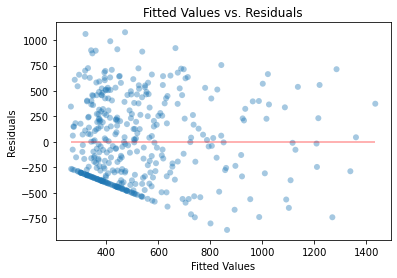

In [15]:
data.fitted_resid_plot()

In [16]:
data.BP_test()

Can't reject H0, there’s no significant heteroscedasticity problem at the 95% confidence level.


{'BP Statistic': 5.71952731506209, 'BP-Test p-value': 0.057282296905240906}

(0.36869736191276836, -0.8201073098344946)

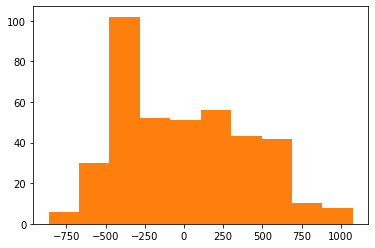

In [17]:
data.skewness(), data.kurtosis()

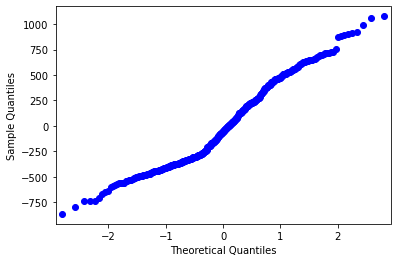

In [18]:
data.qqplot()

In [19]:
data.ominibus(), data.jb_test()

Reject H0, the model is not normality at 95% confidence level.
Reject H0, the model is not normality at 95% confidence level.


({'Ominibus Statistic': 0.5349957710396587,
  'Ominibus-Test p-value': 1.626320588156225e-107},
 {'JB Statistic': 20.272116306161852,
  'JB-Test p-value': 3.962468984386458e-05})

In [20]:
# model selection (slow): 
# data.SubsetSelection('Balance')
# data.ForwardSelection('Balance', method='cp')

In [21]:
df = pd.read_csv('Obese.csv')
logitdata = msds601('Obese.csv', y=df.obese, X=[df.age, df.sbp])

In [22]:
logitdata.logit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4658
Model:                            GLM   Df Residuals:                     4655
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1678.0
Date:                Wed, 09 Dec 2020   Deviance:                       3356.0
Time:                        15:12:59   Pearson chi2:                 4.47e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5051      0.298    -18.489      0.000      -6.089      -4.922
x1             0.0061      0.006      1.058      0.290      -0.005       0.018
x2             0.0240      0.002     12.614      0.000       0.020       0.028
==============================================================================
"""

In [23]:
logitdata.MLE(), logitdata.odds_ratio()

(array([0.00613697, 0.02396519]), array([0.00406585, 1.00615584, 1.02425466]))

In [24]:
logitdata.logit().predict()

array([0.06321204, 0.06842044, 0.03701007, ..., 0.24523253, 0.11231466,
       0.13654071])

In [25]:
logitdata.odds()[:10]

array([0.06747743, 0.07344562, 0.03843246, 0.17106551, 0.10935429,
       0.05187094, 0.10717189, 0.25410906, 0.22253424, 0.1252005 ])

In [26]:
logitdata.logit_probability()[:10]

[0.06321203998485461,
 0.0684204394287612,
 0.03701007416544119,
 0.14607680554185684,
 0.0985747187848425,
 0.049313026030050264,
 0.09679788170395084,
 0.20262118219910008,
 0.18202700198080823,
 0.11126950045570799]

In [27]:
logitdata.deviance()

3356.032656492475